In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from yellowbrick.target import FeatureCorrelation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
from sklearn.linear_model import Lasso,Ridge
import time
warnings.filterwarnings('ignore')
import missingno as msno

In [2]:
df=pd.read_excel('Spotify_data_listens.xlsx',index_col=0)
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_genre,playlist_subgenre,danceability,...,duration_ms,Listens,LEAD STREAMS,FEATURED STREAMS,TRACKS,1B+,100M+,10M+,1M+,playlist_id
0,6KrMDGTp9CtkMLKyftDUTD,Wavelength - Remastered,Van Morrison,44,47nhRTYeYBKV5mEfXLV4fb,Wavelength,1978-09,rock,classic rock,0.541,...,346987,141906,2286497583,80051761,842,0,4,21,126,['6gUFdcGzKAHyDXY9TKC6cP']
1,3JXOMZdeJ7uMR7UfC3BN5T,Top Of The Bill - Live,Scorpions,2,3fWEWigB3tgsGAUN4kNIKf,Tokyo Tapes (50th Anniversary Deluxe Edition),1978-08,rock,hard rock,0.365,...,407333,32530,2038242923,0,354,0,4,19,156,['37i9dQZF1DWViGKI2U5P2K']
2,0iPy1MWCrOT7SjGs14zSSv,Keep Your Head to the Sky,"Earth, Wind & Fire",46,01c1PLpIdfwy47yid7GqKB,Head To The Sky,1973-05,r&b,urban contemporary,0.525,...,311080,598618,2383853016,89300089,428,0,3,20,70,['0pItJZBDZFvgAOdFnSITnJ']
3,683b4ikwa62JevCjwrmfg6,Moondance - 2013 Remaster,Van Morrison,69,7diHYi0CglGJekoM3KaWBK,Moondance (Deluxe Edition),1970-02,rock,permanent wave,0.606,...,274040,222534,2286497583,80051761,842,0,4,21,126,"['3e6gYPyrTbaB8BWgSHCt5j', '5EMARioe9z9eKOeWIA..."
4,3yrSvpt2l1xhsV9Em88Pul,Brown Eyed Girl,Van Morrison,79,7dsWupQRlFuhG8FGiQAUjC,Blowin' Your Mind!,1967-09,rap,southern hip hop,0.491,...,183307,254785,2286497583,80051761,842,0,4,21,126,"['3nTS97zUqxJBQeiXNRs963', '1bMYfBHYBCRHY5LGkj..."


Imported the final dataset after cleaning the data from excel. 

In [3]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,duration_ms,Listens,LEAD STREAMS,FEATURED STREAMS,TRACKS,1B+,100M+,10M+,1M+
count,8318.000000,8318.000000,8318.000000,8318.000000,8318.000000,8318.000000,8318.000000,8318.000000,8318.000000,8318.000000,...,8318.000000,8318.000000,8.318000e+03,8.318000e+03,8.318000e+03,8318.000000,8318.000000,8318.000000,8318.000000,8318.000000
mean,47.973792,0.640006,0.706104,5.334455,-6.160738,0.582231,0.107258,0.167186,0.034385,0.194584,...,121.696963,227891.666987,2.408382e+07,7.073315e+09,1.358755e+09,255.744530,0.749940,15.037269,62.403943,144.215917
std,26.955390,0.151755,0.173365,3.639151,2.643094,0.493221,0.100731,0.209187,0.136747,0.158976,...,28.058793,54983.404524,6.564842e+07,7.465221e+09,2.537087e+09,254.458316,1.478143,17.618854,42.195852,78.756683
min,0.000000,0.130000,0.016700,0.000000,-24.639000,0.000000,0.022400,0.000001,0.000000,0.009360,...,37.114000,37640.000000,0.000000e+00,1.229848e+09,0.000000e+00,16.000000,0.000000,0.000000,6.000000,14.000000
25%,27.000000,0.541000,0.596000,2.000000,-7.364750,0.000000,0.040700,0.017900,0.000000,0.093225,...,98.997500,193324.000000,1.039980e+06,2.296030e+09,3.186425e+07,121.000000,0.000000,4.000000,34.000000,90.000000
50%,57.000000,0.655000,0.728000,5.000000,-5.680000,1.000000,0.062900,0.078200,0.000003,0.130000,...,121.302000,219333.000000,5.445512e+06,4.309996e+09,3.154146e+08,188.000000,0.000000,9.000000,52.000000,128.000000
75%,69.000000,0.751000,0.841000,9.000000,-4.337000,1.000000,0.132000,0.233000,0.000503,0.257000,...,137.380750,252933.000000,1.963136e+07,8.339712e+09,1.565909e+09,294.000000,1.000000,18.000000,82.000000,179.000000
max,100.000000,0.975000,0.998000,11.000000,0.642000,1.000000,0.853000,0.989000,0.969000,0.996000,...,212.058000,517810.000000,1.115478e+09,4.569150e+10,1.772609e+10,2179.000000,9.000000,117.000000,246.000000,606.000000


In [4]:
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
Listens                       int64
LEAD STREAMS                  int64
FEATURED STREAMS              int64
TRACKS                        int64
1B+                           int64
100M+                         int64
10M+                        

In [5]:
df1=df.groupby("track_id")['playlist_id'].apply(list)

In [6]:
df.drop(['playlist_id'],axis=1,inplace=True)
df.drop_duplicates(subset = 'track_id',inplace=True)

In [7]:
df2= pd.DataFrame(df1)

In [8]:
df_outer = pd.merge(df, df2, on='track_id', how='inner')
df_outer

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_genre,playlist_subgenre,danceability,...,duration_ms,Listens,LEAD STREAMS,FEATURED STREAMS,TRACKS,1B+,100M+,10M+,1M+,playlist_id
0,6KrMDGTp9CtkMLKyftDUTD,Wavelength - Remastered,Van Morrison,44,47nhRTYeYBKV5mEfXLV4fb,Wavelength,1978-09,rock,classic rock,0.541,...,346987,141906,2286497583,80051761,842,0,4,21,126,[['6gUFdcGzKAHyDXY9TKC6cP']]
1,3JXOMZdeJ7uMR7UfC3BN5T,Top Of The Bill - Live,Scorpions,2,3fWEWigB3tgsGAUN4kNIKf,Tokyo Tapes (50th Anniversary Deluxe Edition),1978-08,rock,hard rock,0.365,...,407333,32530,2038242923,0,354,0,4,19,156,[['37i9dQZF1DWViGKI2U5P2K']]
2,0iPy1MWCrOT7SjGs14zSSv,Keep Your Head to the Sky,"Earth, Wind & Fire",46,01c1PLpIdfwy47yid7GqKB,Head To The Sky,1973-05,r&b,urban contemporary,0.525,...,311080,598618,2383853016,89300089,428,0,3,20,70,[['0pItJZBDZFvgAOdFnSITnJ']]
3,683b4ikwa62JevCjwrmfg6,Moondance - 2013 Remaster,Van Morrison,69,7diHYi0CglGJekoM3KaWBK,Moondance (Deluxe Edition),1970-02,rock,permanent wave,0.606,...,274040,222534,2286497583,80051761,842,0,4,21,126,"[['3e6gYPyrTbaB8BWgSHCt5j', '5EMARioe9z9eKOeWI..."
4,3yrSvpt2l1xhsV9Em88Pul,Brown Eyed Girl,Van Morrison,79,7dsWupQRlFuhG8FGiQAUjC,Blowin' Your Mind!,1967-09,rap,southern hip hop,0.491,...,183307,254785,2286497583,80051761,842,0,4,21,126,"[['3nTS97zUqxJBQeiXNRs963', '1bMYfBHYBCRHY5LGk..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8313,5tmrnhMxx39jnu3kjopMdP,Evil Ways,Santana,60,2hQwyoPiM1G9iLWkXqC2Hu,Santana (Legacy Edition),1905-05-22 00:00:00,rock,classic rock,0.704,...,238267,267850,1682972727,3307046,614,0,4,24,127,[['5BygwTQ3OrbiwVsQhXFHMz']]
8314,4YMQXzscifAREG0a7KNGhB,Black Magic Woman - Single Version,Santana,65,1YrdGK2y2Edq2R5gFja2ai,Santana's Greatest Hits,1905-05-22 00:00:00,rock,hard rock,0.489,...,196467,290171,1682972727,3307046,614,0,4,24,127,[['3sv5ViKoPDNnZRsklzEGMN']]
8315,3svlCHYt8YCtAYXjKhrpUs,Winter Wonderland,Aretha Franklin,45,4y31w9vk2A1Wn3GGZCpOpq,Runnin' Out of Fools (Expanded Edition),1905-05-17 00:00:00,r&b,neo soul,0.611,...,132107,121642,2098084862,8564886,881,0,4,27,131,[['6FZYc2BvF7tColxO8PBShV']]
8316,27K3ZDS5B4fwjhwyihrdzC,(What A) Wonderful World - Remastered,Sam Cooke,13,4y3NeFX7yaEzQfxy70NhZ3,The Wonderful World Of Sam Cooke (Remastered),1905-05-13 00:00:00,r&b,urban contemporary,0.524,...,125507,128018,1234057665,398630,354,0,3,12,73,[['1S7BckuYIkEazeNKOSM0uA']]


In [9]:
df_outer.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
Listens                     0
LEAD STREAMS                0
FEATURED STREAMS            0
TRACKS                      0
1B+                         0
100M+                       0
10M+                        0
1M+                         0
playlist_id                 0
dtype: int64

no null values in the dataset so our dataset is cleaned already.

In [10]:
df_outer.set_index("track_album_release_date", inplace=True)

In [11]:
df_outer.index=pd.to_datetime(df_outer.index)

In [12]:
df_outer["duration"]= df_outer["duration_ms"].apply(lambda x: round(x/1000))
df_outer.drop("duration_ms", inplace=True, axis=1)

# EDA Process.

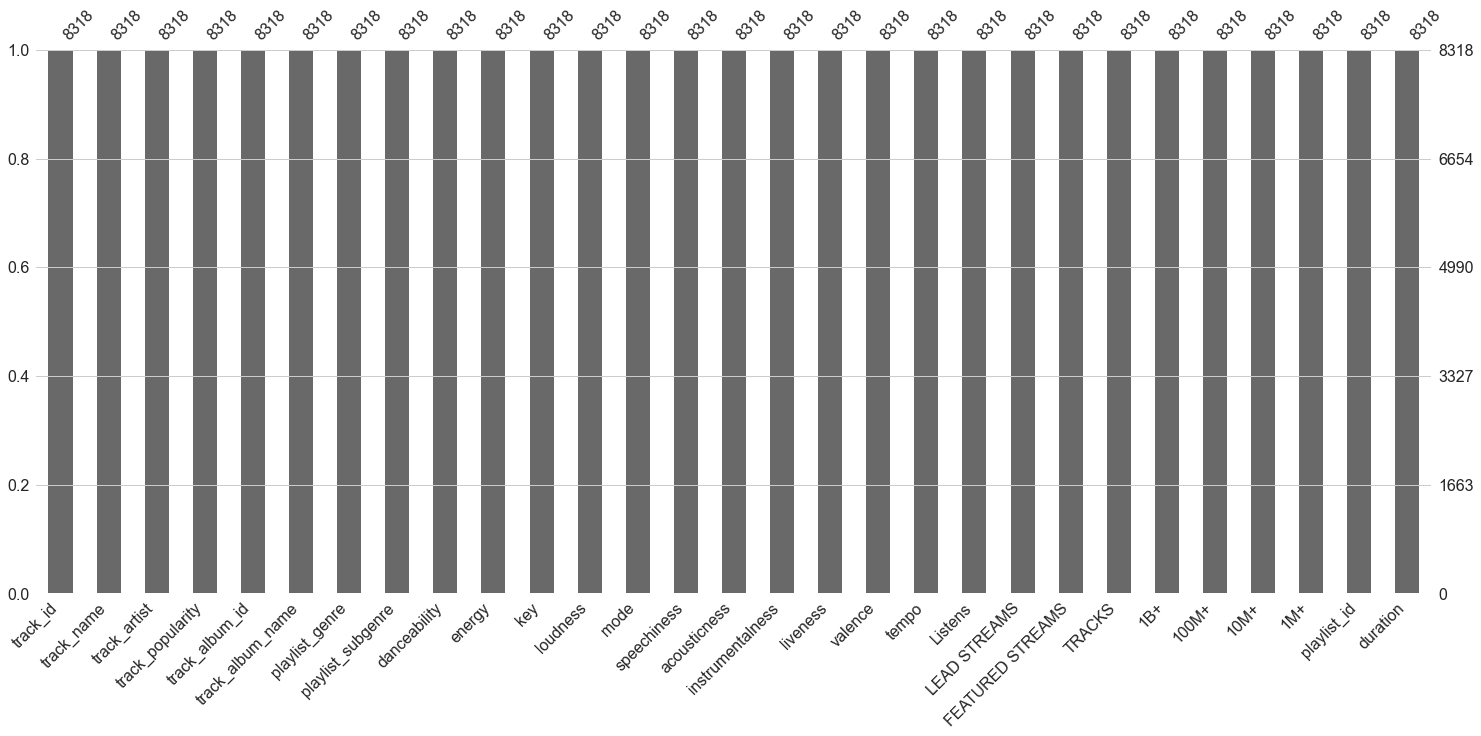

In [13]:
msno.bar(df_outer)

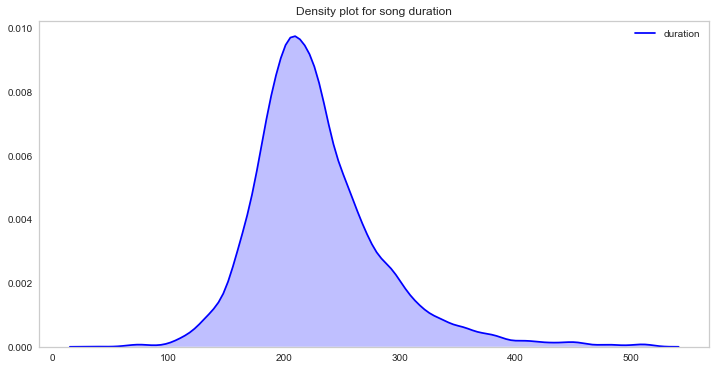

In [14]:
plt.figure(figsize=(12,6))
plt.title('Density plot for song duration')
sns.kdeplot(df_outer['duration'], color="blue", shade=True)
plt.grid()
plt.show()

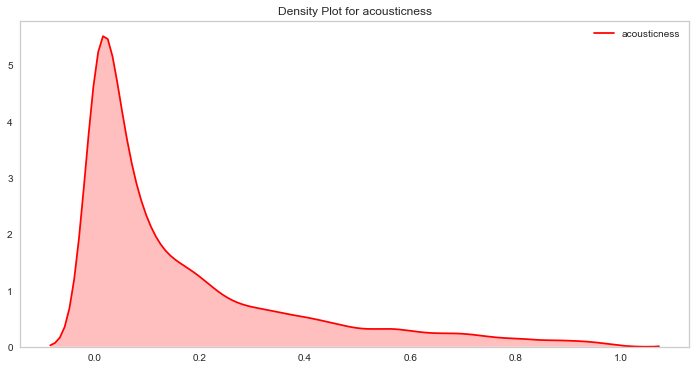

In [15]:
plt.figure(figsize=(12,6))
plt.title('Density Plot for acousticness')
sns.kdeplot(df_outer['acousticness'], color="red", shade=True)
plt.grid()
plt.show()

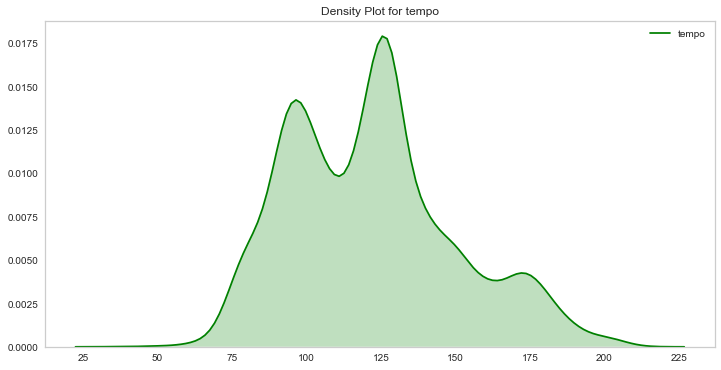

In [16]:
plt.figure(figsize=(12,6))
plt.title('Density Plot for tempo')
sns.kdeplot(df_outer['tempo'], color="green", shade=True)
plt.grid()
plt.show()

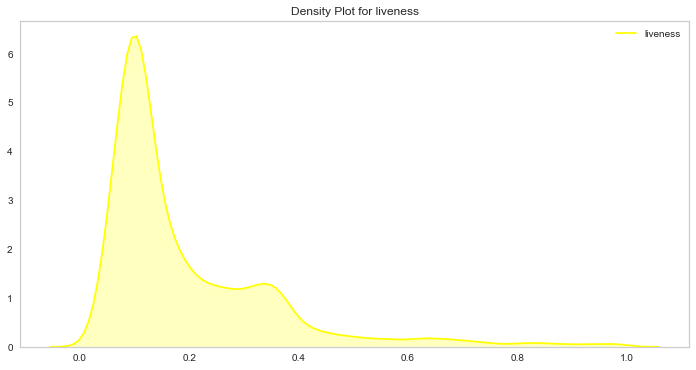

In [17]:
plt.figure(figsize=(12,6))
plt.title('Density Plot for liveness')
sns.kdeplot(df_outer['liveness'], color="yellow", shade=True)
plt.grid()
plt.show()

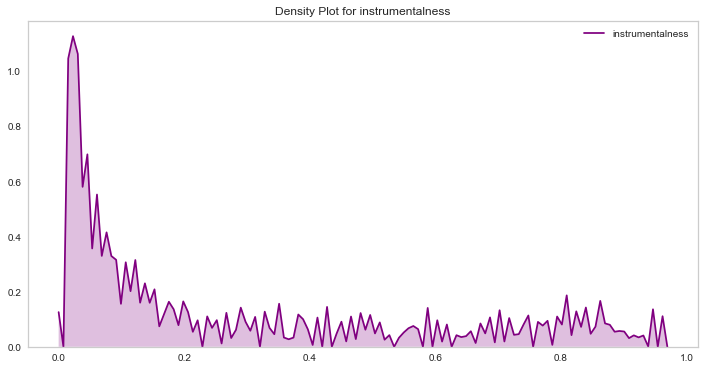

In [18]:
plt.figure(figsize=(12,6))
plt.title('Density Plot for instrumentalness')
sns.kdeplot(df_outer['instrumentalness'], color="purple", shade=True)
plt.grid()
plt.show()

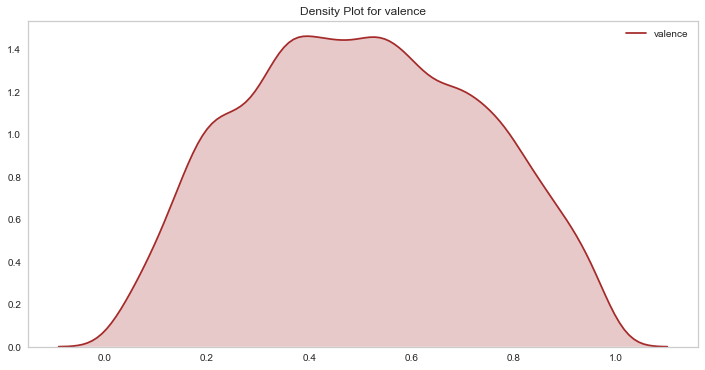

In [19]:
plt.figure(figsize=(12,6))
plt.title('Density Plot for valence')
sns.kdeplot(df_outer['valence'], color="brown", shade=True)
plt.grid()
plt.show()

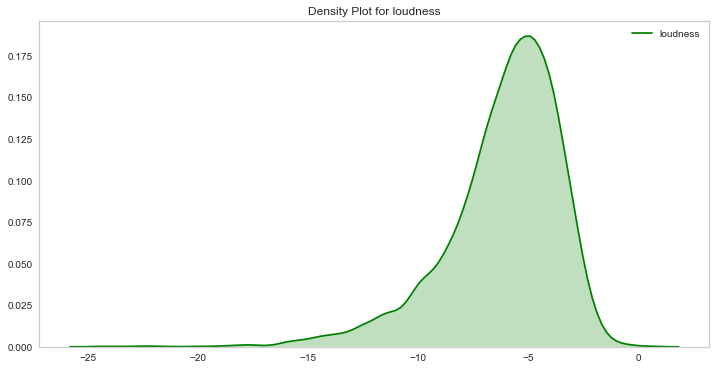

In [20]:
plt.figure(figsize=(12,6))
plt.title('Density Plot for loudness')
sns.kdeplot(df_outer['loudness'], color="green", shade=True)
plt.grid()
plt.show()

FeatureCorrelation(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000271AC9646A0>,
                   labels=array(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration'], dtype='<U16'))

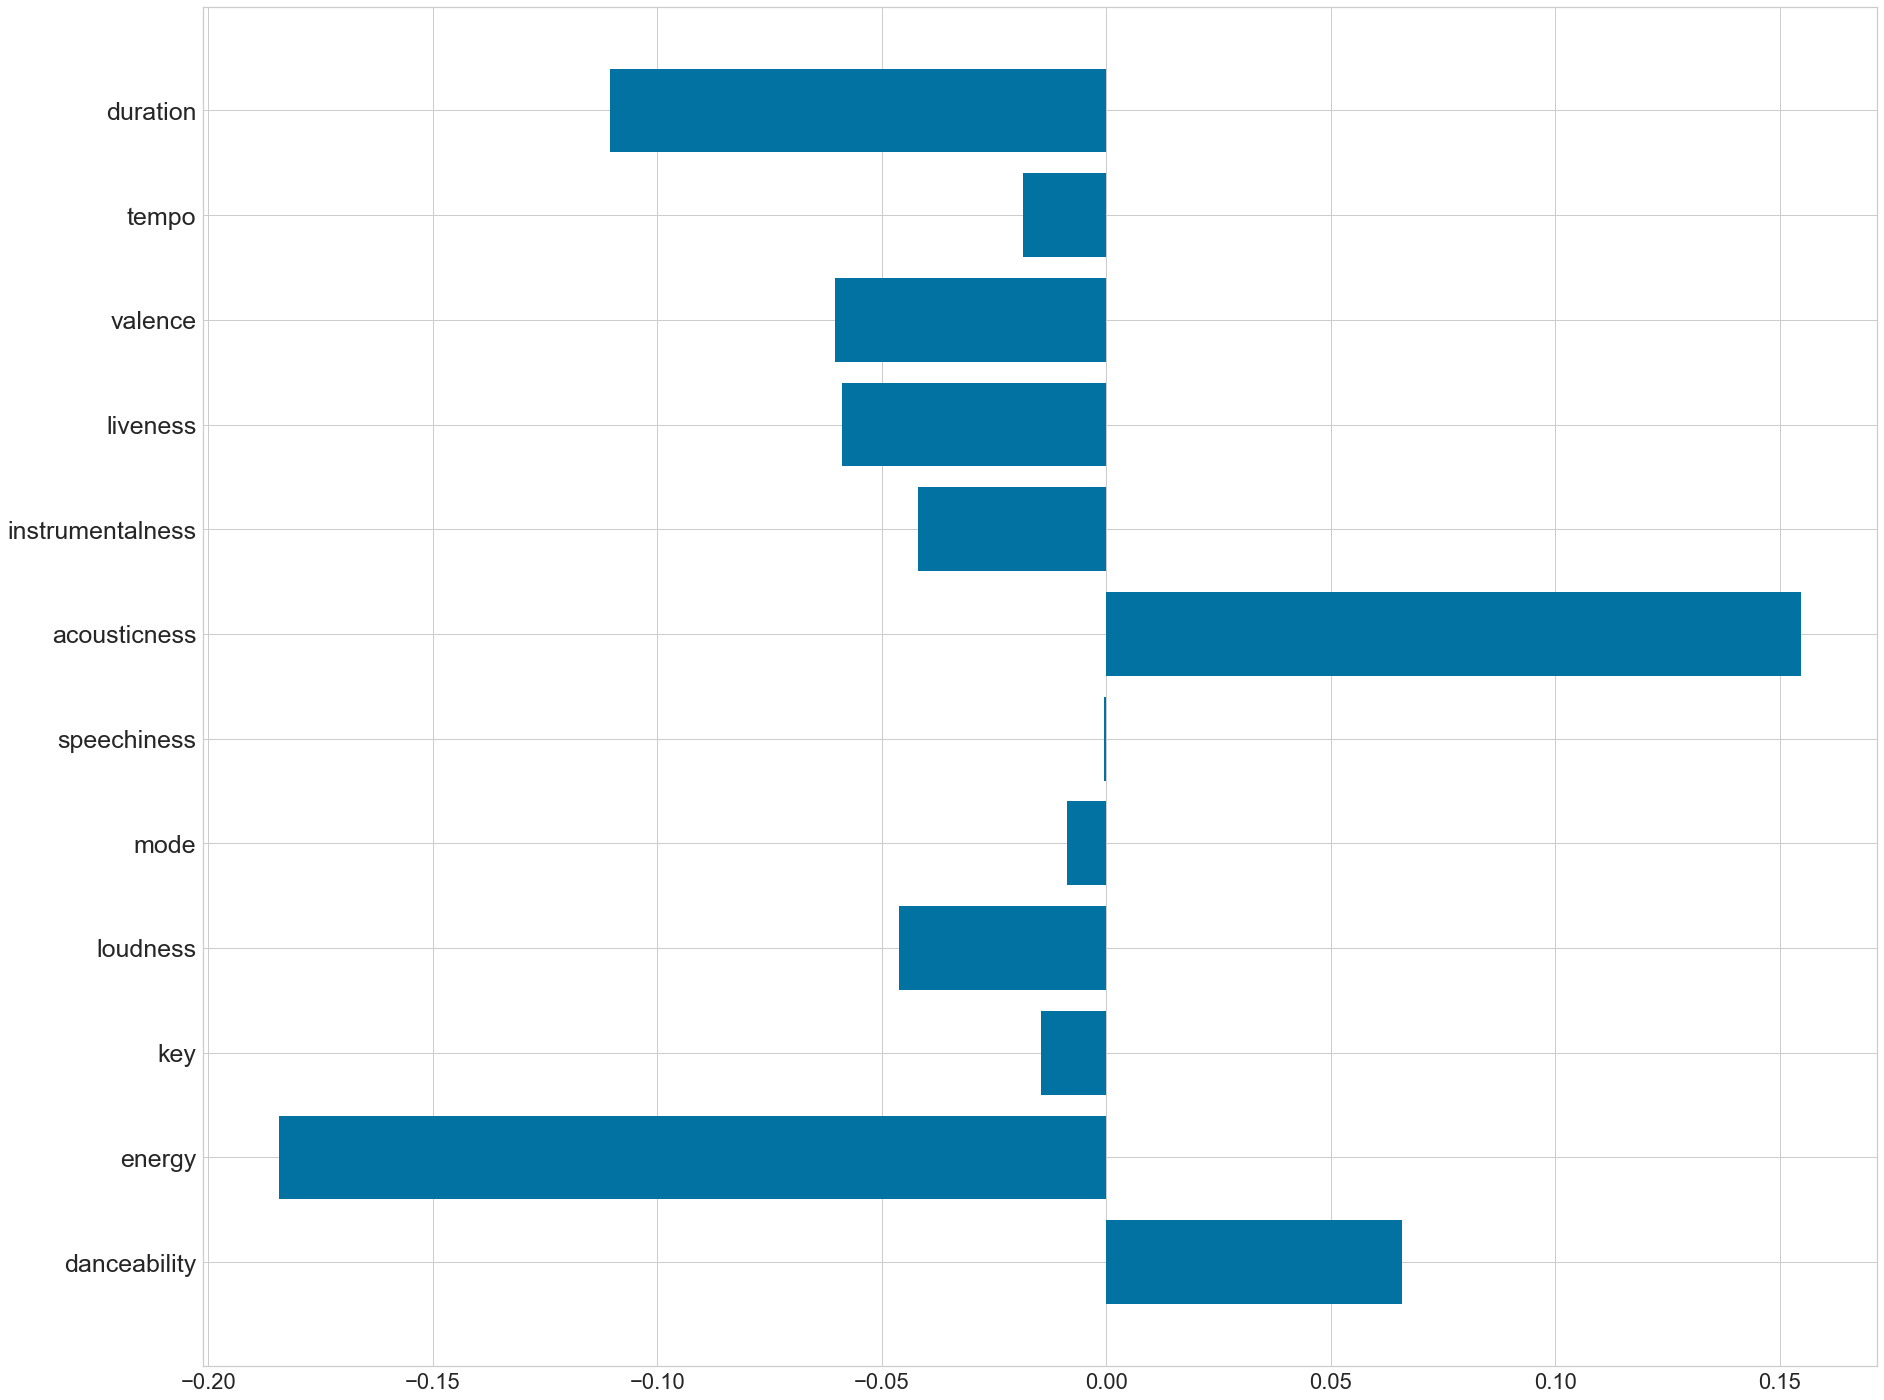

In [21]:
feature_names=['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness',
               'liveness','valence',
               'tempo','duration']
x,y=df_outer[feature_names],df_outer['Listens']
feature=np.array(feature_names)
visual=FeatureCorrelation(labels=feature)
plt.rcParams['figure.figsize']=(30,25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=22)
visual.fit(x,y)

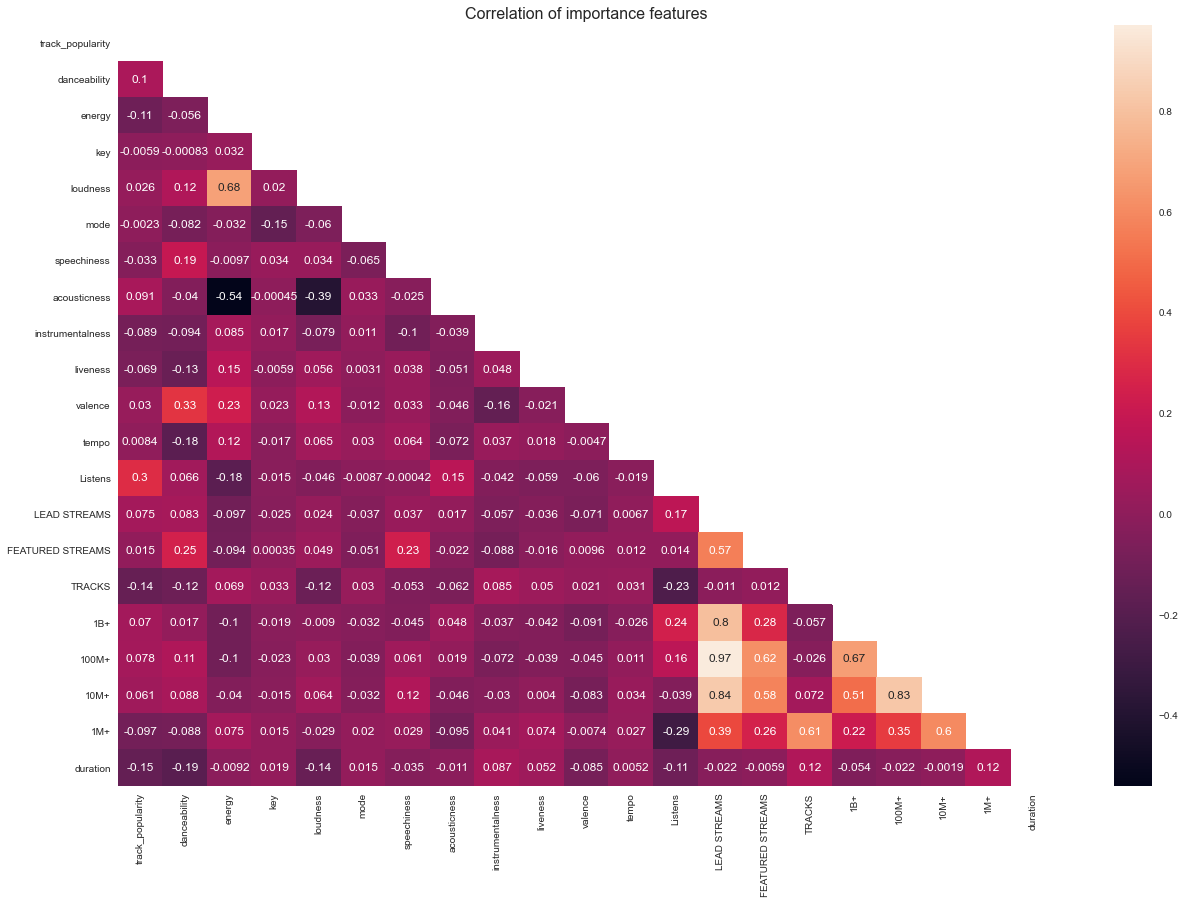

In [22]:
fig,ax=plt.subplots(1,1,figsize=(21,14))
sns.heatmap(df_outer.corr(),mask=np.triu(df.corr()),annot=True)
plt.title('Correlation of importance features',size=16)
plt.show()

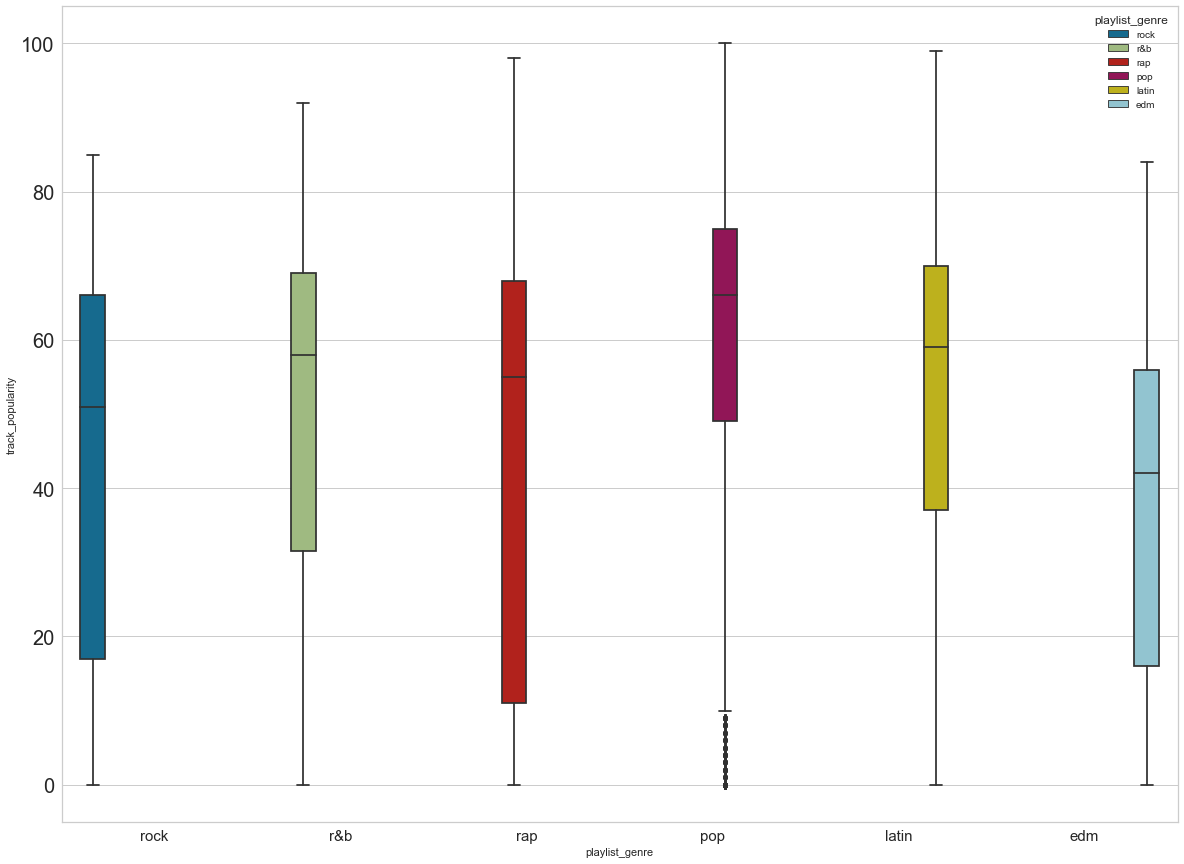

In [23]:
plt.figure(figsize=(20,15))
plt.yticks(fontsize=20)
plt.xticks(fontsize=15)
sns.boxplot(x='playlist_genre',y="track_popularity",hue='playlist_genre',data=df_outer)


In [24]:
df_outer.drop(['key','mode','tempo'],axis=1,inplace=True)

In [25]:
df11=pd.read_csv('Spotify_data_listens_outliers.csv',index_col=0)

In [26]:
df11.shape

(6917, 32)

In [27]:
df_outer=df11

# Model Building

In [28]:
df_outer.dtypes

Unnamed: 1                    int64
track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
Listens                     float64
LEAD STREAMS                  int64
FEATURED STREAMS              int64
TRACKS                        int64
1B+                           int64
100M+                       

In [29]:
df_outer.drop(['playlist_id'],axis=1,inplace=True)
df_outer.drop(['track_id'],axis=1,inplace=True)
df_outer.drop(['track_album_id'],axis=1,inplace=True)
df_outer.drop(['outlier'],axis=1,inplace=True)

In [30]:
le=LabelEncoder()
objList = df_outer.select_dtypes(include = "object").columns
print (objList)

Index(['track_name', 'track_artist', 'track_album_name',
       'track_album_release_date', 'playlist_genre', 'playlist_subgenre'],
      dtype='object')


In [31]:
for x in objList:
    df_outer[x] = le.fit_transform(df_outer[x].astype(str))

In [32]:
df_outer

,Unnamed: 1,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,...,tempo,duration_ms,Listens,LEAD STREAMS,FEATURED STREAMS,TRACKS,1B+,100M+,10M+,1M+
0,44,5477,763,44,4124,1177,5,2,0.541,0.863,...,142.829,346987,1.419055e+05,2286497583,80051761,842,0,4,21,126
2,46,2627,214,46,1542,1176,3,23,0.525,0.476,...,88.943,311080,5.986180e+05,2383853016,89300089,428,0,3,20,70
3,69,3260,763,69,2377,1175,5,15,0.606,0.282,...,67.409,274040,2.225336e+05,2286497583,80051761,842,0,4,21,126
4,79,702,763,79,519,1174,4,20,0.491,0.583,...,150.572,183307,2.547849e+05,2286497583,80051761,842,0,4,21,126
6,73,5527,335,73,4157,994,2,3,0.857,0.708,...,113.015,180645,3.242122e+07,4008239293,479458782,95,1,9,37,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,60,1488,631,60,3117,1301,5,2,0.704,0.528,...,117.472,238267,2.678500e+05,1682972727,3307046,614,0,4,24,127
8373,65,585,631,65,3118,1301,5,7,0.489,0.349,...,124.348,196467,2.901708e+05,1682972727,3307046,614,0,4,24,127
8374,45,5649,52,45,3071,1010,3,13,0.611,0.359,...,106.274,132107,1.216421e+05,2098084862,8564886,881,0,4,27,131
8375,13,9,625,13,3819,760,3,23,0.524,0.543,...,128.091,125507,1.280184e+05,1234057665,398630,354,0,3,12,73


In [33]:
x=df_outer.drop(['Listens'],axis=1)
y=df_outer['Listens']

In [34]:
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

In [35]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.653914,1.467094,1.576118,-0.653914,1.506657,0.555842,1.414634,-1.336039,-0.674916,0.928789,...,0.073248,0.746727,2.278139,-0.658126,-0.495189,2.274626,-0.515076,-0.643988,-0.997312,-0.216180
1,-0.549733,-0.199958,-0.767563,-0.549733,-0.499079,0.554070,0.189669,1.655022,-0.781344,-1.303325,...,-0.596446,-1.181091,1.606187,-0.644990,-0.491500,0.680230,-0.515076,-0.701575,-1.021143,-0.911560
2,0.648349,0.170303,1.576118,0.648349,0.149561,0.552298,1.414634,0.515570,-0.242553,-2.422265,...,0.253889,-1.951488,0.913033,-0.658126,-0.495189,2.274626,-0.515076,-0.643988,-0.997312,-0.216180
3,1.169254,-1.325948,1.576118,1.169254,-1.293761,0.550525,0.802152,1.227727,-1.007503,-0.686177,...,1.769510,1.023739,-0.784914,-0.658126,-0.495189,2.274626,-0.515076,-0.643988,-0.997312,-0.216180
4,0.856711,1.496340,-0.251014,0.856711,1.532292,0.231515,-0.422814,-1.193607,1.427033,0.034790,...,-0.759463,-0.319894,-0.834730,-0.425804,-0.335898,-0.602219,0.150615,-0.356049,-0.616004,-0.688045


In [36]:
x=pd.DataFrame(x)

In [37]:
model=[LinearRegression(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),
       AdaBoostRegressor(),GradientBoostingRegressor()]

0.290813907014292
mean sqaured error of: LinearRegression() is 2996082858085941.0
mean absolute error of: LinearRegression() is 26662660.397205934
root mean squared error of: LinearRegression() is 54736485.62052501
r2_score of: LinearRegression() is 0.28868548317729437
_________________________________________________________________________________________________
-0.08510163770249513
mean sqaured error of: SVR() is 4580590691172664.0
mean absolute error of: SVR() is 23958105.743282545
root mean squared error of: SVR() is 67680061.25272541
r2_score of: SVR() is -0.08750018226652334
_________________________________________________________________________________________________
0.635935554980125
mean sqaured error of: KNeighborsRegressor() is 2488663835007279.0
mean absolute error of: KNeighborsRegressor() is 17747698.788393833
root mean squared error of: KNeighborsRegressor() is 49886509.54924867
r2_score of: KNeighborsRegressor() is 0.4091542867198079
_______________________________

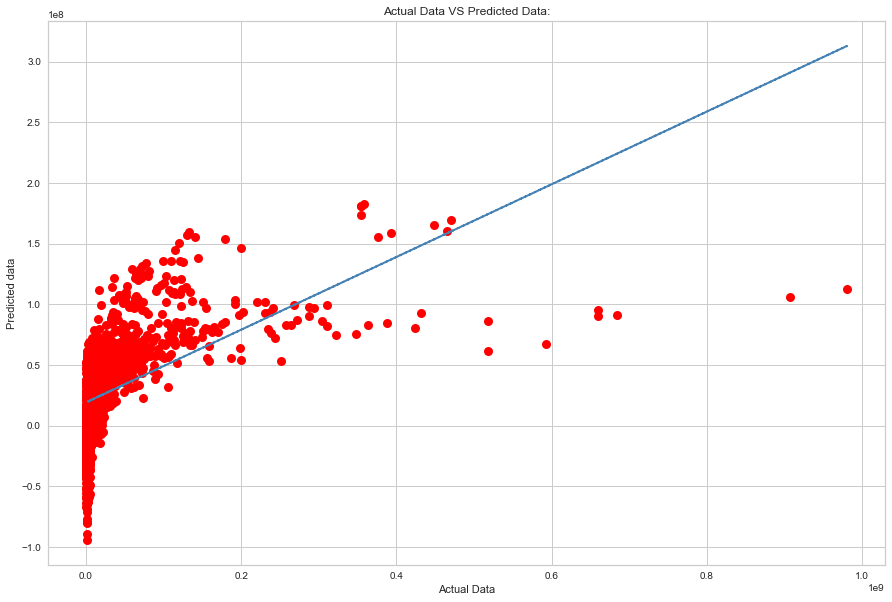

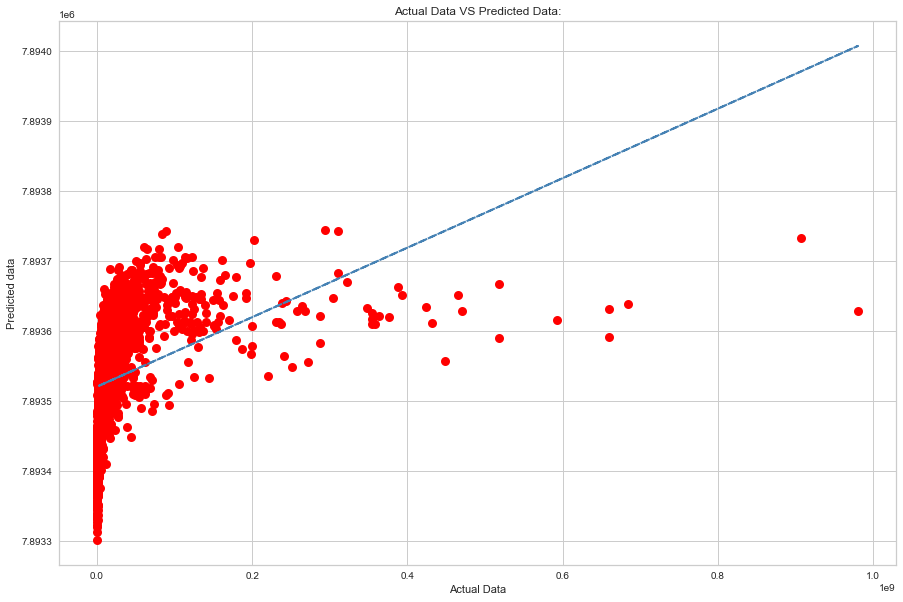

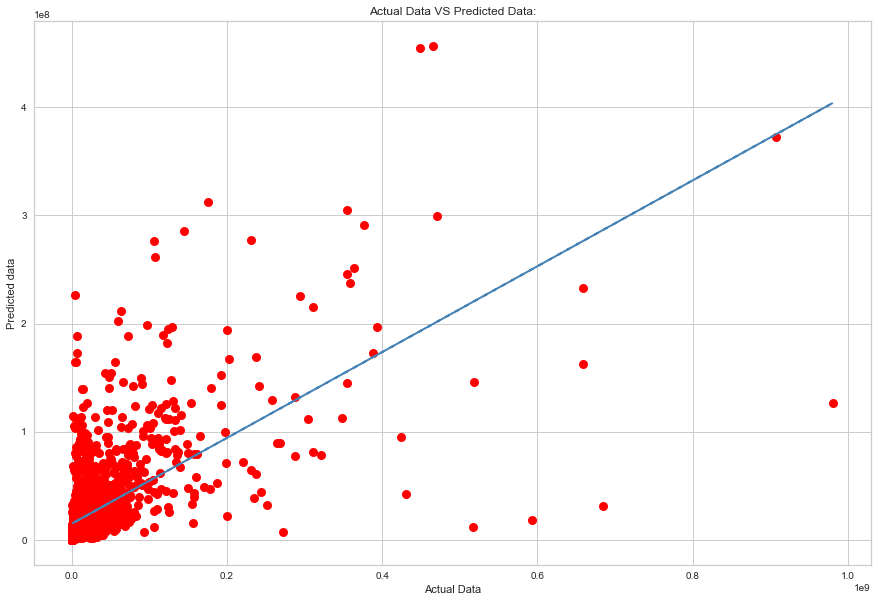

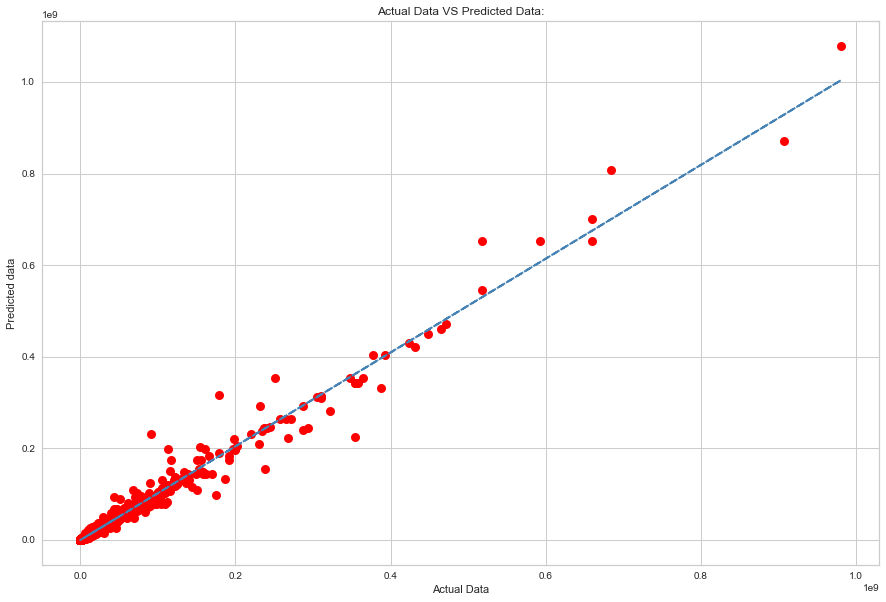

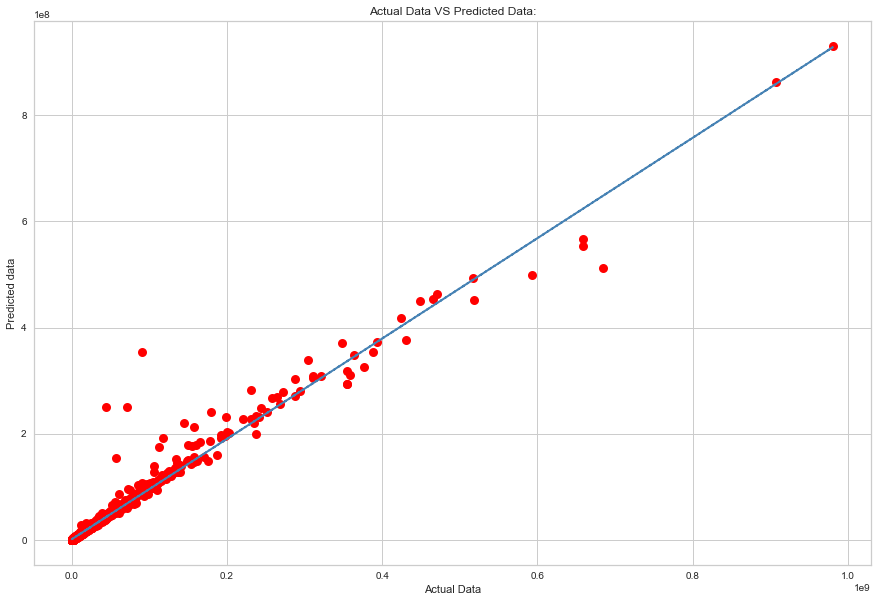

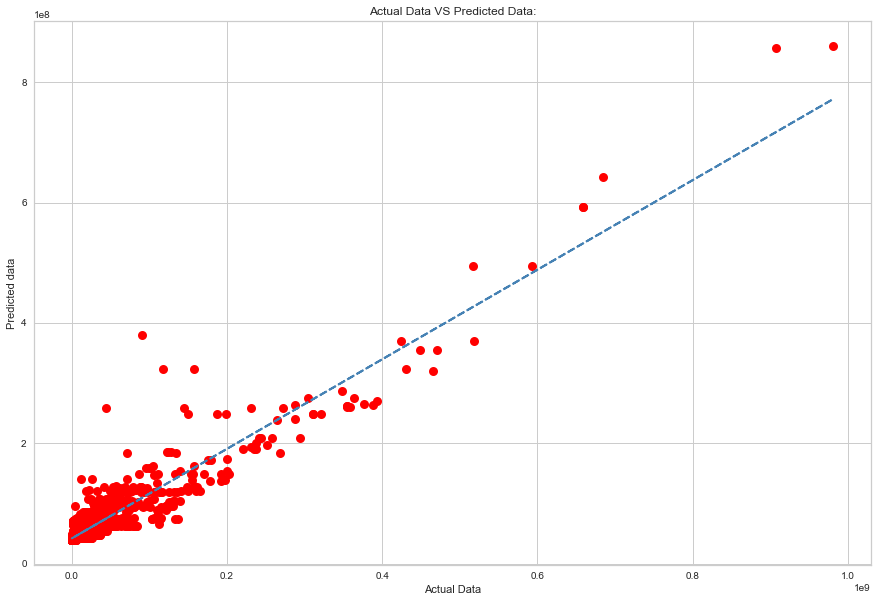

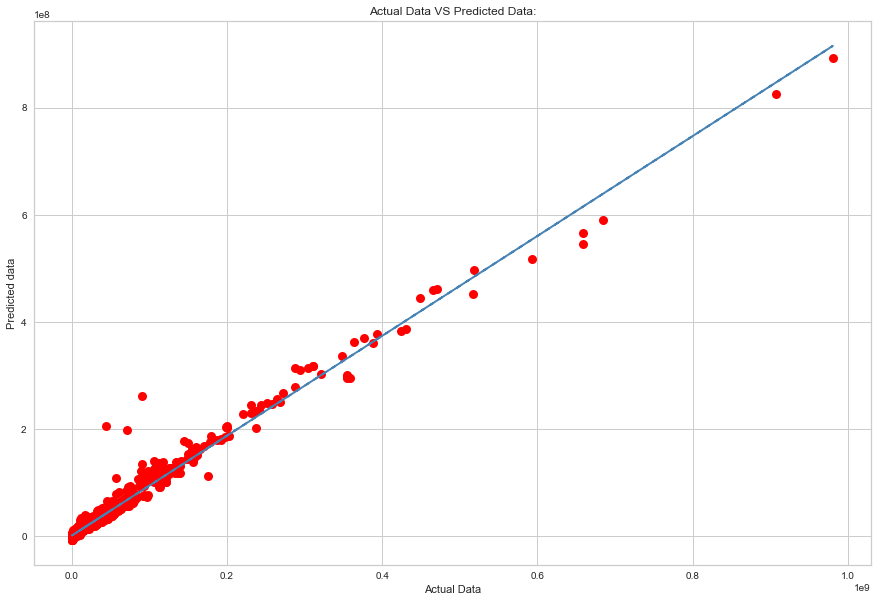

In [38]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.70,random_state=42)
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('mean sqaured error of:',m,"is",mean_squared_error(y_test,predm))
    print('mean absolute error of:',m,"is",mean_absolute_error(y_test,predm))
    print('root mean squared error of:',m,"is",np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score of:',m,"is",r2_score(y_test,predm))
    plt.figure(figsize=(15,10))
    a, b = np.polyfit(y_test, predm, 1)
    plt.scatter(y_test,predm,linewidths=2,color='red')
    plt.xlabel('Actual Data')
    plt.ylabel('Predicted data')
    plt.plot(y_test, a*y_test+b,color='steelblue', linestyle='--', linewidth=2)
    plt.title('Actual Data VS Predicted Data:')
    print("_________________________________________________________________________________________________")

In [39]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4841, 27) (2076, 27) (4841,) (2076,)


In [39]:
best_model=GradientBoostingRegressor()
best_model.fit(x_train,y_train)
prediction_GBR=best_model.predict(x_test)
print("Prediction values:",prediction_GBR)
print("final output value:",y_test,prediction_GBR)
final_dataset=pd.DataFrame({'Listens':y_test.values,'predicted value':prediction_GBR})

Prediction values: [39995556.92092145 10716439.46437839  3170022.41946117 ...
   105455.62386233  5436139.20793518  9351029.40565103]
final output value: 585     4.753082e+07
6229    9.730593e+06
5547    2.620186e+06
3104    7.194539e+06
6893    3.674135e+06
            ...     
50      1.981271e+07
4945    2.763964e+06
1438    1.211610e+06
6496    5.314855e+06
480     8.503553e+06
Name: Listens, Length: 2076, dtype: float64 [39995556.92092145 10716439.46437839  3170022.41946117 ...
   105455.62386233  5436139.20793518  9351029.40565103]


Text(0.5, 1.0, 'Actual Data VS Predicted Data for Gradient Boosting Regressor')

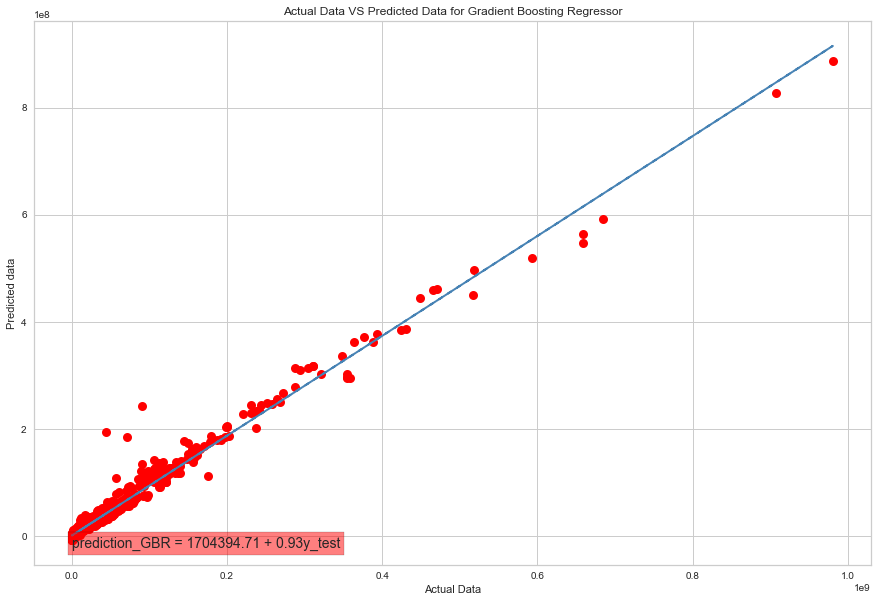

In [54]:
plt.figure(figsize=(15,10))
a, b = np.polyfit(y_test, prediction_GBR, 1)
plt.scatter(y_test,prediction_GBR,linewidths=2,color='red')
plt.xlabel('Actual Data')
plt.ylabel('Predicted data')
#add line of best fit to plot
plt.plot(y_test, a*y_test+b,color='steelblue', linestyle='--', linewidth=2)
plt.text(2, 15, 'prediction_GBR = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'y_test', size=14,
         horizontalalignment='left',bbox=dict(facecolor='red', alpha=0.5),verticalalignment='top')
plt.title('Actual Data VS Predicted Data for Gradient Boosting Regressor')

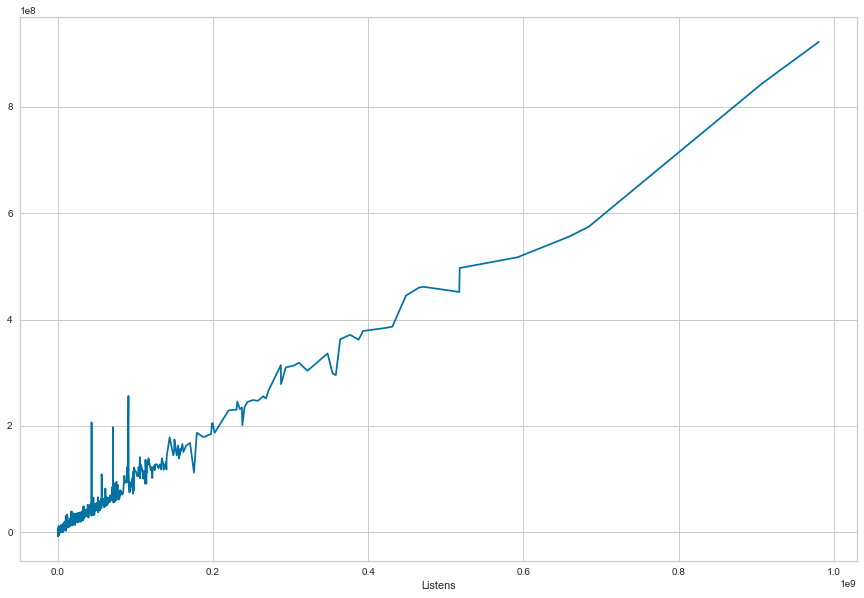

In [42]:
plt.figure(figsize=(15,10))
sns.lineplot(x=y_test, y=prediction_GBR, palette='Set2')
plt.show()

In [44]:
mymodel = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                     min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)

In [51]:
predictors = [x for x in x_train.columns]
param_test1 = {'n_estimators':range(10,100,10)}
CV_gbr = GridSearchCV(estimator=mymodel, param_grid=param_test1, scoring='r2',n_jobs=4, cv= 5)
CV_gbr.fit(x_train[predictors],y_train)
CV_gbr.best_params_, CV_gbr.best_score_

({'n_estimators': 90}, 0.8201860782814998)

In [53]:
final_dataset
final_dataset.to_csv('predicted_major_project.csv')